In [7]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import tree 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from time import time
from sklearn.metrics import r2_score
import os


In [8]:
data = pd.read_csv('C:/Users/user/Desktop/kc_house_data.csv')

In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [11]:
# Check any number of columns with NaN or missing values 
print(data.isnull().any().sum(), ' / ', len(data.columns))
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))
    

0  /  19
0  /  21613


In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor





dataset = data[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','long','lat','yr_built','yr_renovated']]
dataset.head()               
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'long', 'lat', 'yr_built', 'yr_renovated'],
      dtype='object')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,long,lat,yr_built,yr_renovated
20477,0.036721,0.090909,0.25000,0.070189,0.000403,0.8,0.0,0.0,0.50,0.583333,0.101974,0.0,0.144287,0.868820,0.930435,0.0
4102,0.025567,0.121212,0.12500,0.086792,0.005500,0.0,0.0,0.0,0.25,0.500000,0.126096,0.0,0.208507,0.248164,0.556522,0.0
3415,0.042623,0.060606,0.21875,0.137358,0.005451,0.0,0.0,0.0,0.25,0.500000,0.199561,0.0,0.173478,0.955621,0.417391,0.0
12167,0.016393,0.060606,0.12500,0.043019,0.003683,0.0,0.0,0.0,1.00,0.416667,0.062500,0.0,0.158465,0.527166,0.426087,0.0
8823,0.045902,0.060606,0.25000,0.074717,0.002166,0.4,0.0,0.0,0.75,0.583333,0.108553,0.0,0.100917,0.628814,0.156522,0.0


# sqft_living

In [61]:
x = dataset.iloc[:,[3]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [14]:
#Grade
x = dataset.iloc[:,[9]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:02:25   Log-Likelihood:            -3.0125e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.057e+06   1.23e+04    -86.195      0.000   -1.08e+06   -1.03e+06
x1          2.086e+05   1583.062    131.770      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19902.422   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043214.690
Skew:                           4.085   Prob(JB):                         0.00
Kurtosis:                      49.927   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#sqft_above
x = dataset.iloc[:,[10]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:02:25   Log-Likelihood:            -3.0268e+05
No. Observations:               21613   AIC:                         6.054e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.974e+04   4732.848     12.623      0.000    5.05e+04     6.9e+04
x1           268.6443      2.401    111.866      0.000     263.937     273.351
==============================================================================
Omnibus:                    16505.934   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           729337.804
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.699   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#sqft_above
x = dataset.iloc[:,[8]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.66
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           8.72e-08
Time:                        23:40:36   Log-Likelihood:            -3.0760e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.701e+05   1.33e+04     35.295      0.000    4.44e+05    4.96e+05
x1          2.054e+04   3837.601      5.353      0.000     1.3e+04    2.81e+04
==============================================================================
Omnibus:                    19122.282   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136508.224
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.602   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#bathrooms
x = dataset.iloc[:,[2]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:02:25   Log-Likelihood:            -3.0413e+05
No. Observations:               21613   AIC:                         6.083e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+04   6214.660      1.684      0.092   -1714.314    2.26e+04
x1          2.505e+05   2761.302     90.713      0.000    2.45e+05    2.56e+05
==============================================================================
Omnibus:                    17272.178   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882972.925
Skew:                           3.455   Prob(JB):                         0.00
Kurtosis:                      33.541   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#view
x = dataset.iloc[:,[7]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4052.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:02:25   Log-Likelihood:            -3.0576e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.956e+05   2397.950    206.656      0.000    4.91e+05       5e+05
x1          1.905e+05   2992.500     63.653      0.000    1.85e+05    1.96e+05
==============================================================================
Omnibus:                    17915.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1030222.691
Skew:                           3.622   Prob(JB):                         0.00
Kurtosis:                      36.038   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#sqft_basemwnt
x = dataset.iloc[:,[11]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2532.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:02:27   Log-Likelihood:            -3.0642e+05
No. Observations:               21613   AIC:                         6.128e+05
Df Residuals:                   21611   BIC:                         6.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.618e+05   2831.023    163.130      0.000    4.56e+05    4.67e+05
x1           268.8033      5.342     50.318      0.000     258.332     279.274
==============================================================================
Omnibus:                    17958.261   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889286.574
Skew:                           3.695   Prob(JB):                         0.00
Kurtosis:                      33.543   Cond. No.                         635.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#bedrooms
x = dataset.iloc[:,[1]].values
y = dataset.iloc[:,[0]].values
x= np.append(arr=np.ones((21613,1)).astype(int),values = x,axis = 1)
regressor_OLS=sm.OLS(endog=y,exog=x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2270.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        02:12:57   Log-Likelihood:            -3.0654e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.296e+05   8937.619     14.506      0.000    1.12e+05    1.47e+05
x1          1.218e+05   2555.949     47.649      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18848.009   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194538.337
Skew:                           3.901   Prob(JB):                         0.00
Kurtosis:                      38.575   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

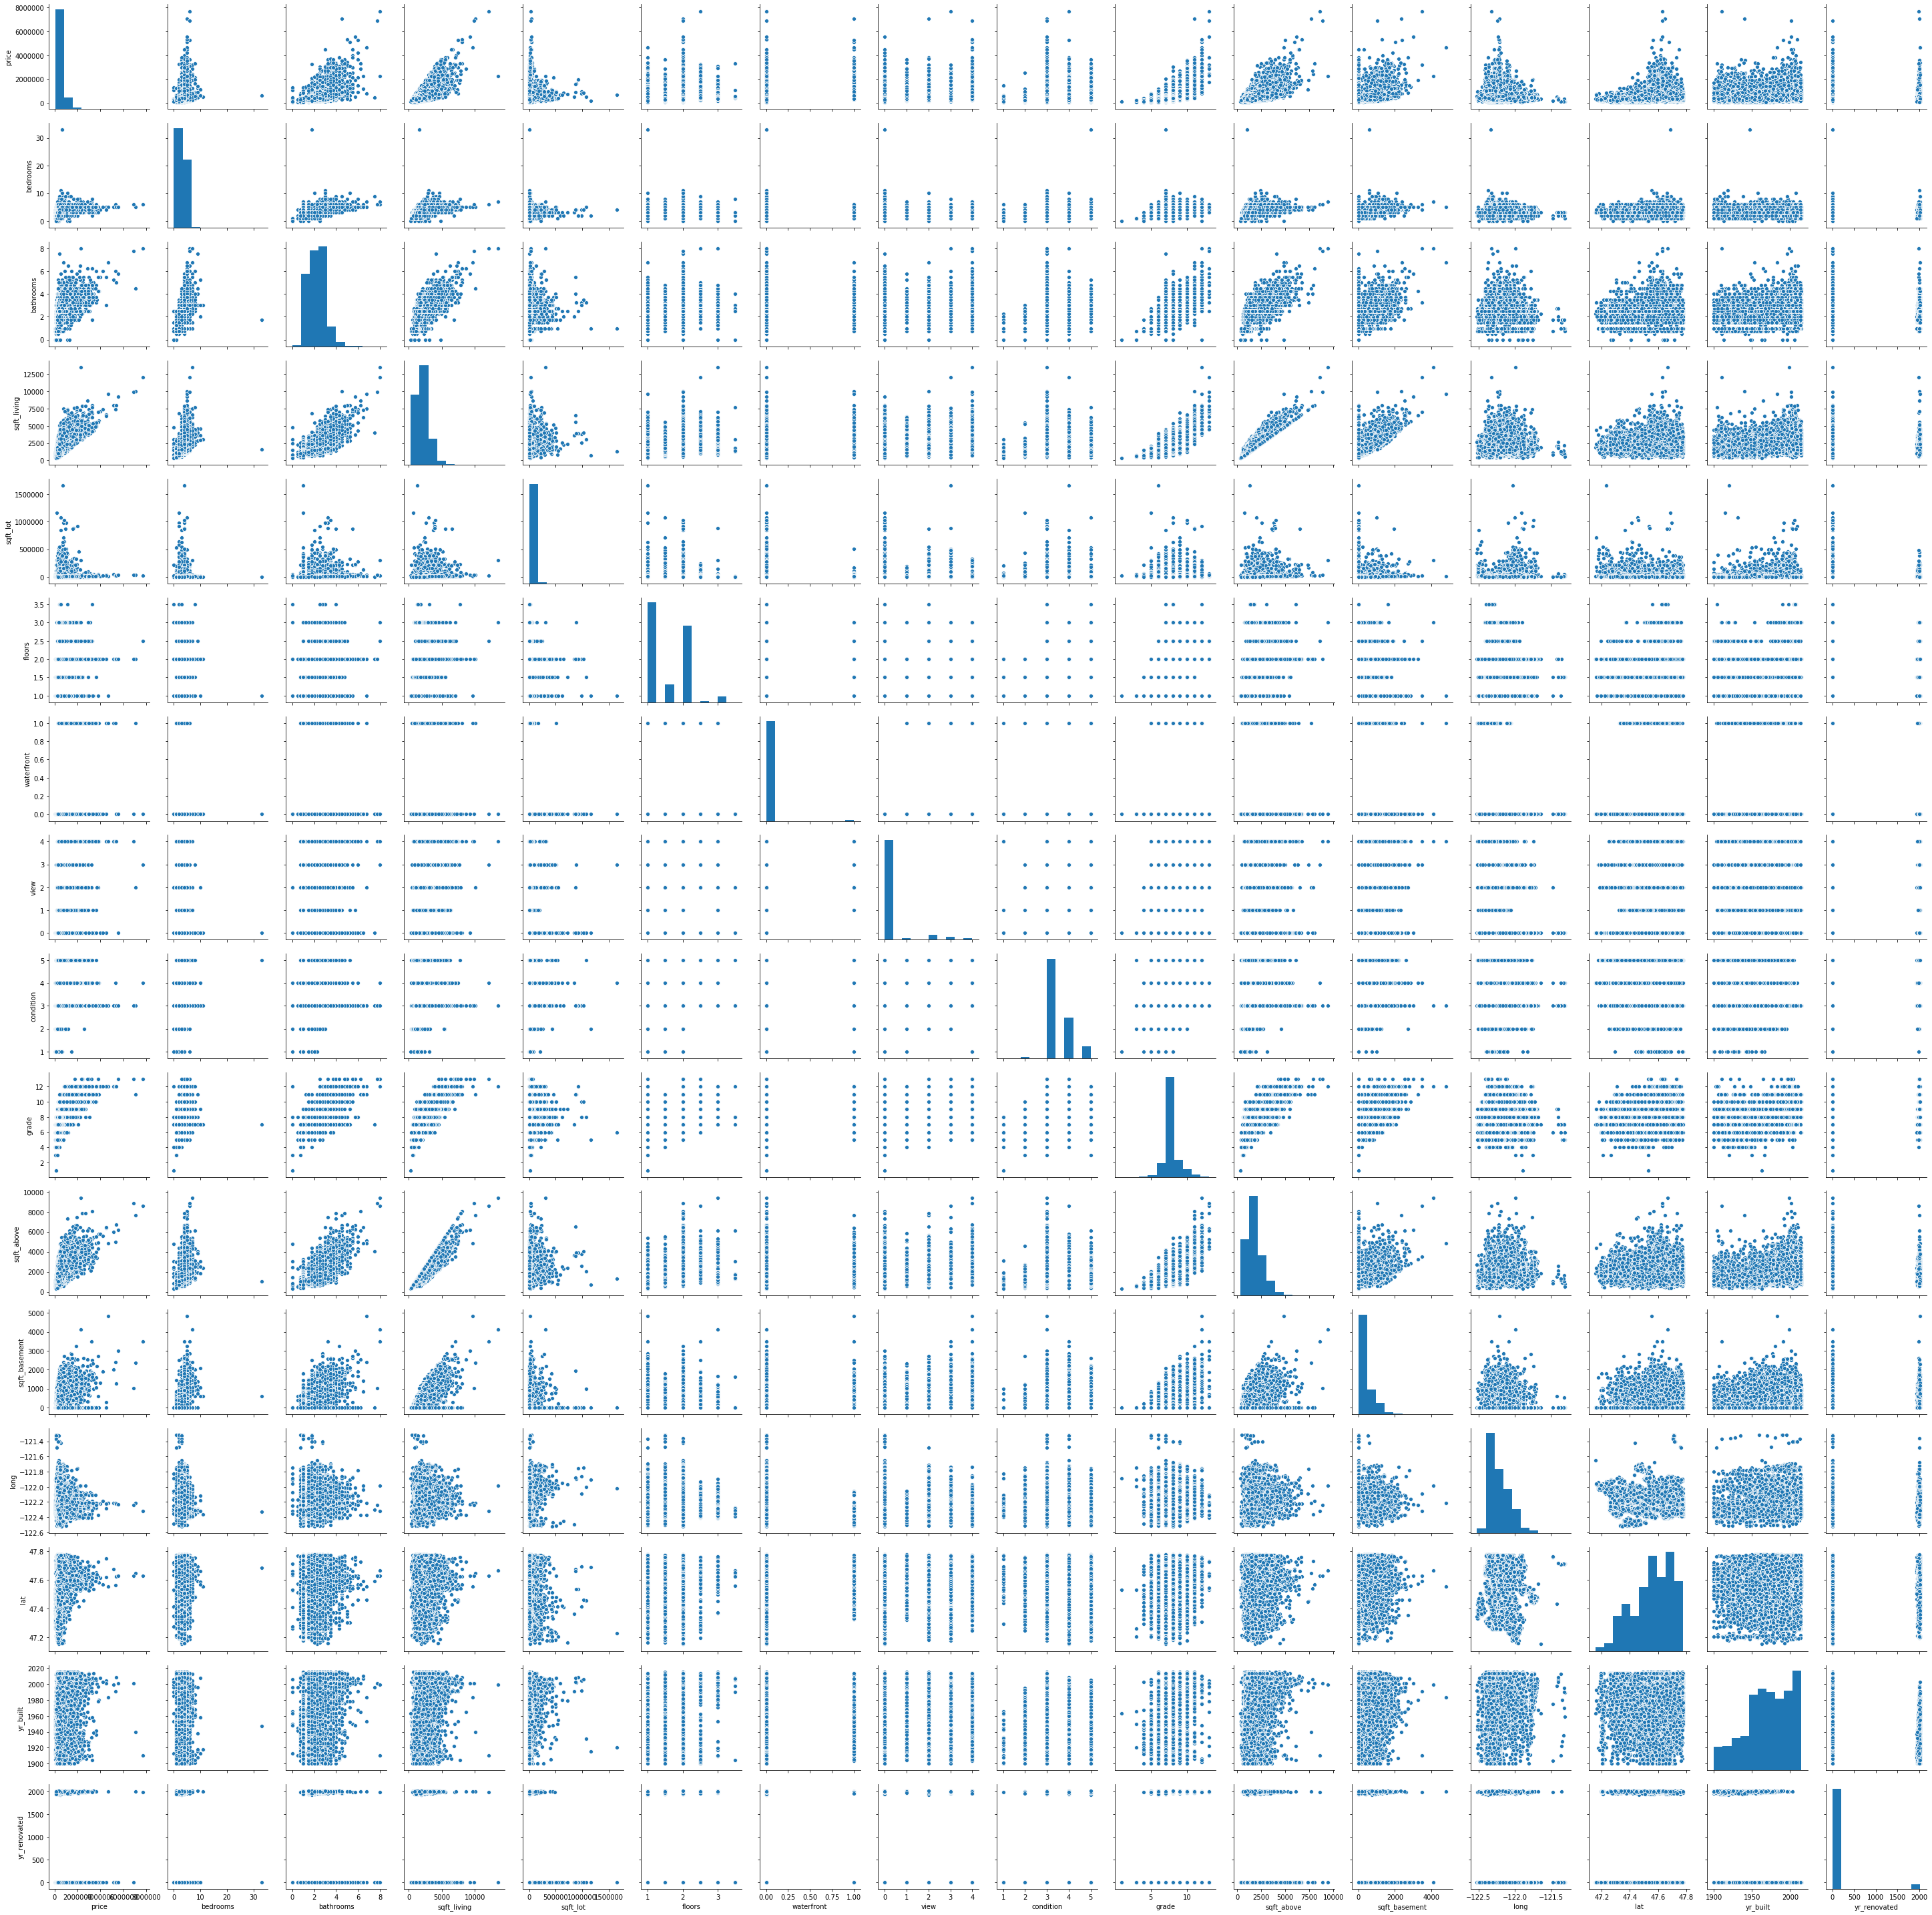

In [16]:
sns.pairplot(dataset)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','long','lat']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,long,lat,yr_built,yr_renovated
20477,0.036721,0.090909,0.25000,0.070189,0.000403,0.8,0.0,0.0,0.50,0.583333,0.101974,0.0,0.144287,0.868820,0.930435,0.0
4102,0.025567,0.121212,0.12500,0.086792,0.005500,0.0,0.0,0.0,0.25,0.500000,0.126096,0.0,0.208507,0.248164,0.556522,0.0
3415,0.042623,0.060606,0.21875,0.137358,0.005451,0.0,0.0,0.0,0.25,0.500000,0.199561,0.0,0.173478,0.955621,0.417391,0.0
12167,0.016393,0.060606,0.12500,0.043019,0.003683,0.0,0.0,0.0,1.00,0.416667,0.062500,0.0,0.158465,0.527166,0.426087,0.0
8823,0.045902,0.060606,0.25000,0.074717,0.002166,0.4,0.0,0.0,0.75,0.583333,0.108553,0.0,0.100917,0.628814,0.156522,0.0


In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [47]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# model 1

In [25]:
X_train_new = build_model(X_train,y_train)
checkVIF(X_train_new)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2504.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:03:07   Log-Likelihood:                 33514.
No. Observations:               15129   AIC:                        -6.700e+04
Df Residuals:                   15114   BIC:                        -6.688e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0848      0.002    -39.549

,Features,VIF
3,sqft_living,inf
10,sqft_above,inf
11,sqft_basement,inf
0,const,99.73
2,bathrooms,3.36
9,grade,3.10
14,yr_built,2.37
5,floors,1.96
1,bedrooms,1.62
7,view,1.43


In [29]:
X = pd.DataFrame(X_train)
y = pd.DataFrame(y_train)
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

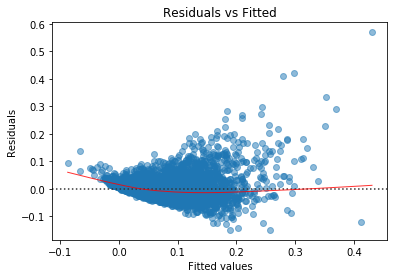

In [30]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# model 2

In [50]:
X_train_new = X_train.drop(["floors"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2697.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:32:32   Log-Likelihood:                 33514.
No. Observations:               15129   AIC:                        -6.700e+04
Df Residuals:                   15115   BIC:                        -6.689e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0848      0.002    -39.746

,Features,VIF
3,sqft_living,inf
9,sqft_above,inf
10,sqft_basement,inf
0,const,98.69
2,bathrooms,3.11
8,grade,3.09
13,yr_built,2.27
1,bedrooms,1.62
6,view,1.43
11,long,1.38


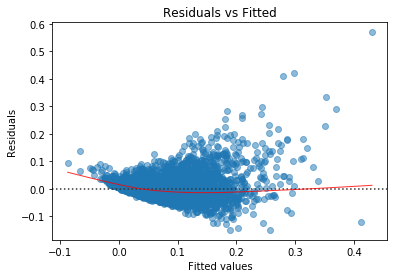

In [32]:
X = pd.DataFrame(X_train_new)
y = pd.DataFrame(y_train)
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [51]:
X_train_new = X_train_new.drop(["sqft_lot"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2922.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:34:07   Log-Likelihood:                 33513.
No. Observations:               15129   AIC:                        -6.700e+04
Df Residuals:                   15116   BIC:                        -6.690e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0849      0.002    -39.827

,Features,VIF
3,sqft_living,inf
8,sqft_above,inf
9,sqft_basement,inf
0,const,98.50
2,bathrooms,3.11
7,grade,3.09
12,yr_built,2.26
1,bedrooms,1.61
5,view,1.42
10,long,1.33


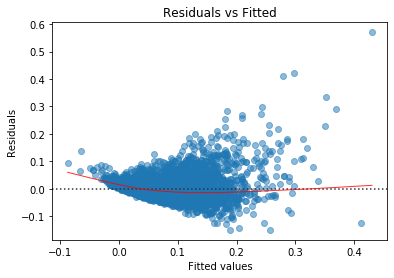

In [52]:
X = pd.DataFrame(X_train_new)
y = pd.DataFrame(y_train)
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [53]:
X_train_new = X_train_new.drop(["yr_renovated"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3186.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:14   Log-Likelihood:                 33511.
No. Observations:               15129   AIC:                        -6.700e+04
Df Residuals:                   15117   BIC:                        -6.691e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0843      0.002    -39.901

,Features,VIF
3,sqft_living,inf
8,sqft_above,inf
9,sqft_basement,inf
0,const,96.75
7,grade,3.09
2,bathrooms,3.03
12,yr_built,2.05
1,bedrooms,1.61
5,view,1.42
10,long,1.33


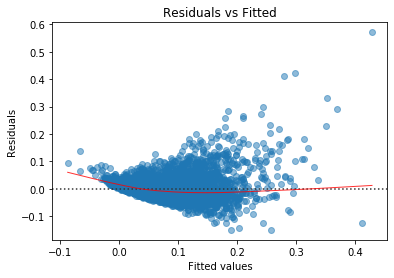

In [35]:
X = pd.DataFrame(X_train_new)
y = pd.DataFrame(y_train)
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [54]:
X_train_new = X_train_new.drop(["sqft_living"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3186.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:32   Log-Likelihood:                 33511.
No. Observations:               15129   AIC:                        -6.700e+04
Df Residuals:                   15117   BIC:                        -6.691e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0843      0.002    -39.901

,Features,VIF
0,const,96.75
7,sqft_above,3.95
6,grade,3.09
2,bathrooms,3.03
11,yr_built,2.05
8,sqft_basement,1.70
1,bedrooms,1.61
4,view,1.42
9,long,1.33
3,waterfront,1.23


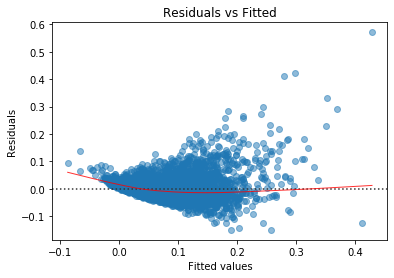

In [38]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [55]:
X_train_new = X_train_new.drop(["sqft_basement"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     3217.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:36:44   Log-Likelihood:                 33063.
No. Observations:               15129   AIC:                        -6.610e+04
Df Residuals:                   15118   BIC:                        -6.602e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1025      0.002    -49.111      0.0

,Features,VIF
0,const,88.98
7,sqft_above,3.15
6,grade,2.90
2,bathrooms,2.62
10,yr_built,1.95
1,bedrooms,1.48
4,view,1.37
8,long,1.33
3,waterfront,1.23
5,condition,1.19


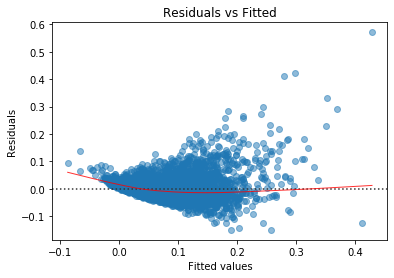

In [40]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [56]:
X_train_new = X_train_new.drop(["condition"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     3511.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:37:01   Log-Likelihood:                 32971.
No. Observations:               15129   AIC:                        -6.592e+04
Df Residuals:                   15119   BIC:                        -6.585e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0890      0.002    -48.229      0.0

,Features,VIF
0,const,68.65
6,sqft_above,3.12
5,grade,2.90
2,bathrooms,2.61
9,yr_built,1.73
1,bedrooms,1.47
4,view,1.37
7,long,1.32
3,waterfront,1.23
8,lat,1.09


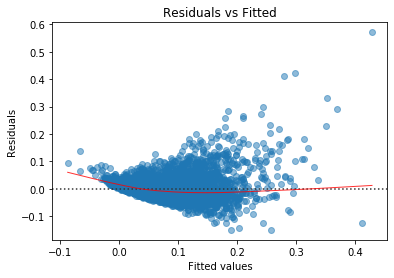

In [42]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');